# <font color='crimson'>Red Wine Quality Prediction</font>

# <font color='crimson'>Importing all necessary modules</font>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## <font color='crimson'>Data Reading</font>

In [116]:
wine = pd.read_csv('winequality_red.csv')
wine.shape

(1599, 12)

In [117]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## <font color='crimson'>Data Info</font>

In [118]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [119]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <font color='crimson'>Null value Checking</font>

In [120]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## <font color='crimson'>Dependent variable Analysis</font>

In [121]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

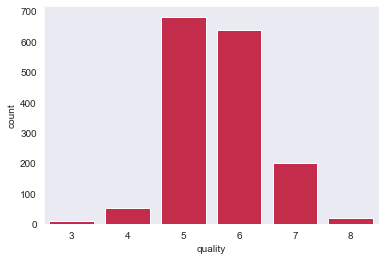

In [122]:
sns.countplot(x='quality',palette=['crimson'],data=wine)
plt.show()

## <font color='crimson'>Reduction of dependent variable classes</font>

In [123]:
wine.quality =wine.quality.replace(3,6)
wine.quality =wine.quality.replace(8,5)
wine.quality =wine.quality.replace(4,5)
wine.quality =wine.quality.replace(7,6)

wine.quality.value_counts().to_frame()

,quality
6,847
5,752


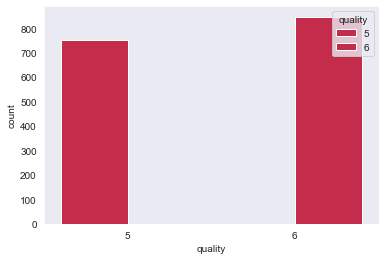

In [124]:
sns.countplot(x='quality',hue='quality',palette=['crimson'],data=wine)
plt.show()

In [125]:
wine.quality =wine.quality.astype('str')

## <font color='crimson'>Univariate Analysis</font>

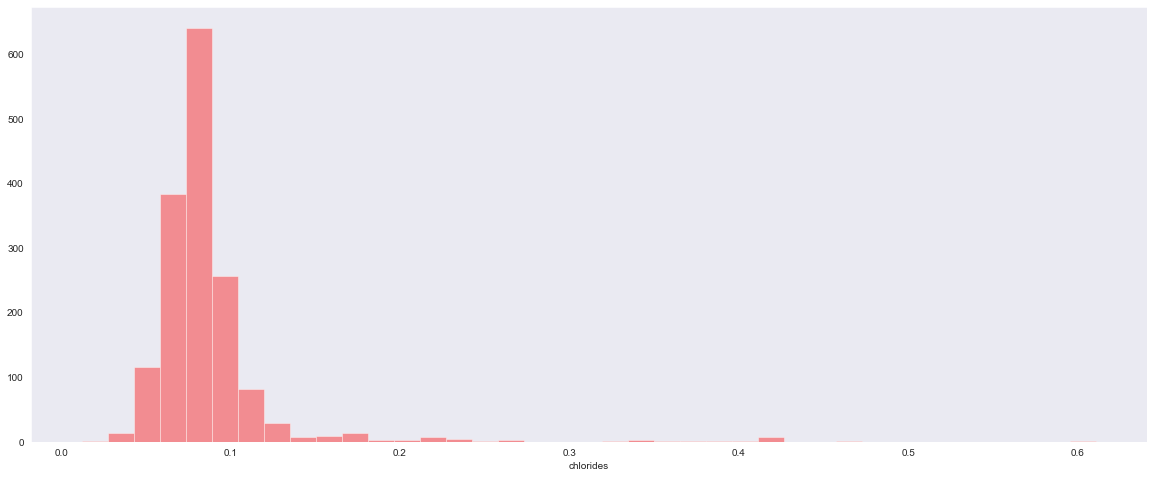

In [126]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.chlorides,kde=False, bins=int(np.sqrt(1599)),color="r")
plt.show()


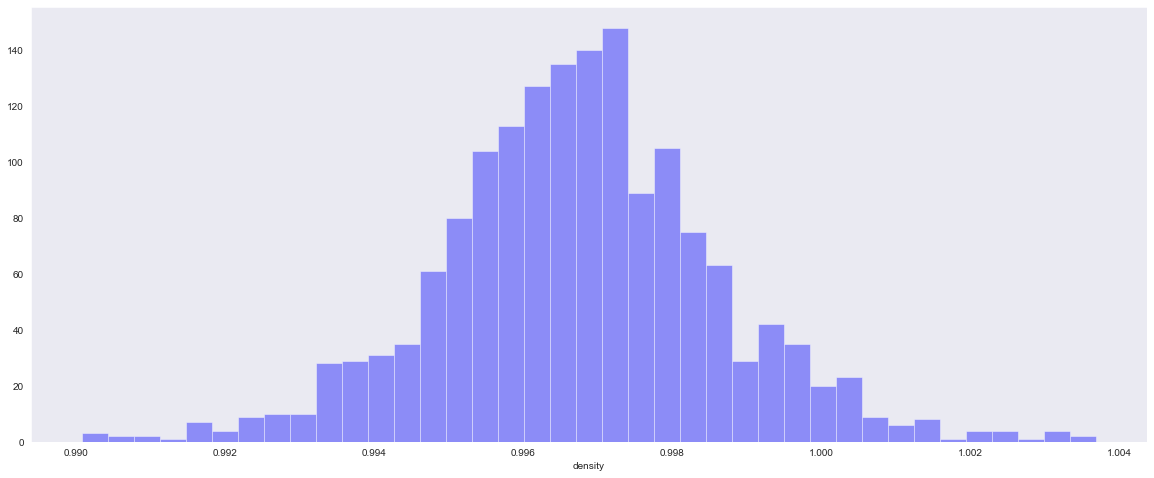

In [127]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.density,kde=False, bins=int(np.sqrt(1599)),color="b")
plt.show()


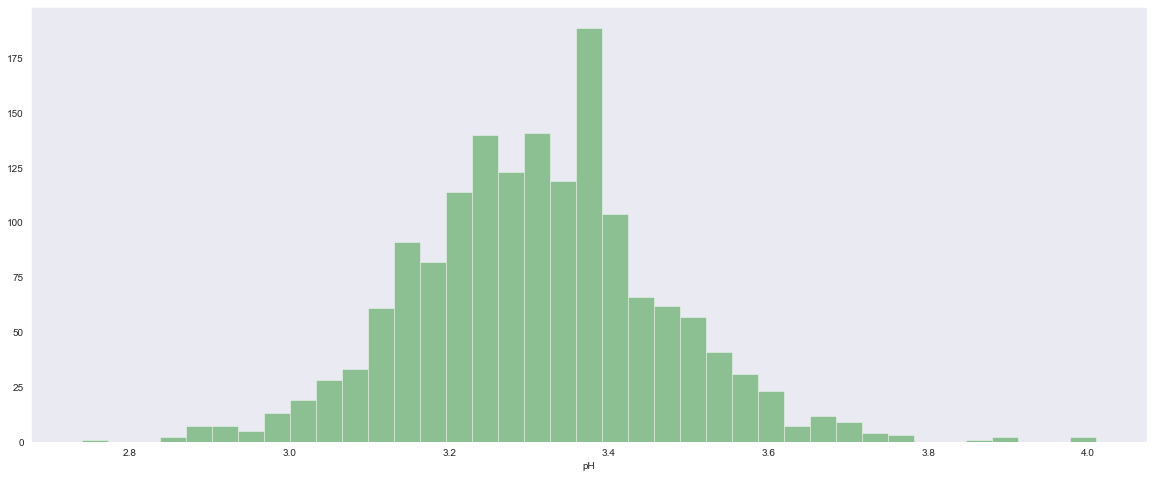

In [128]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.pH,kde=False, bins=int(np.sqrt(1599)),color="g")
plt.show()


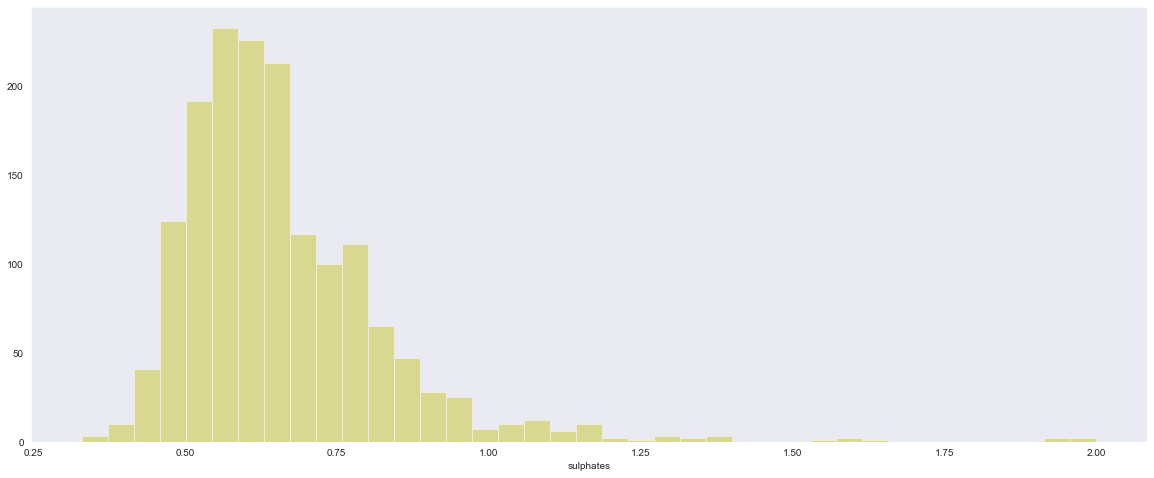

In [129]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.sulphates,kde=False, bins=int(np.sqrt(1599)),color="y")
plt.show()


## <font color='crimson'>Multivariate Analysis</font>

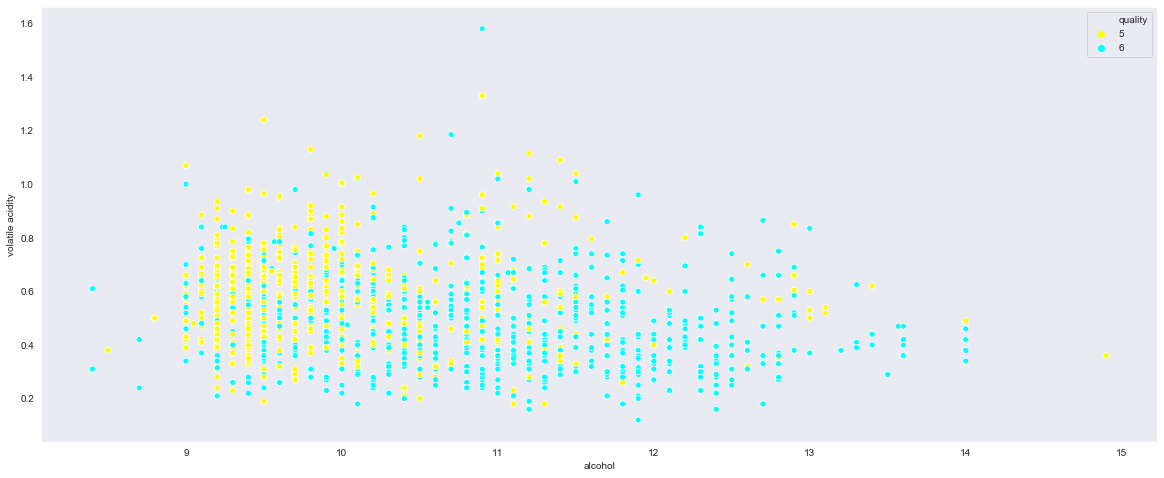

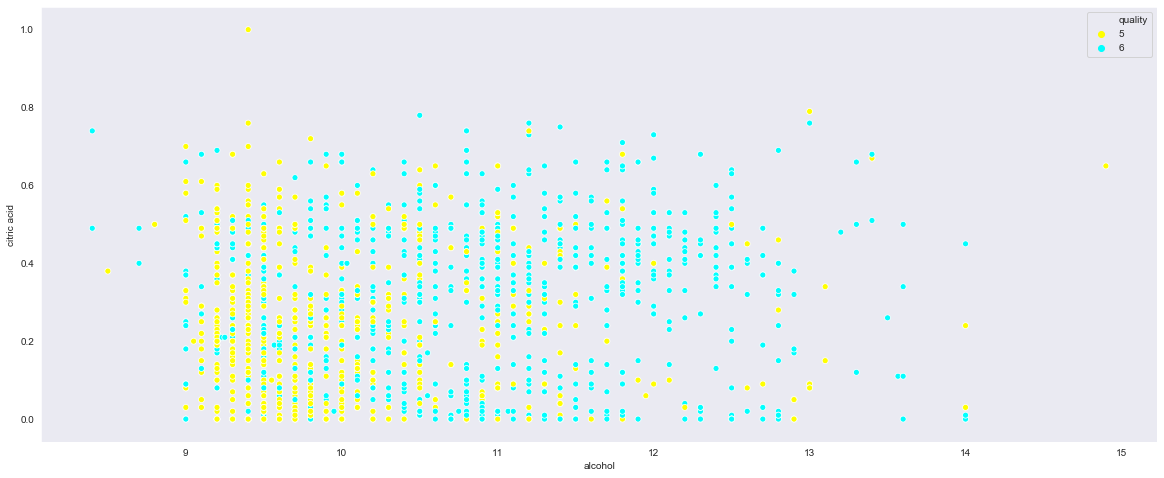

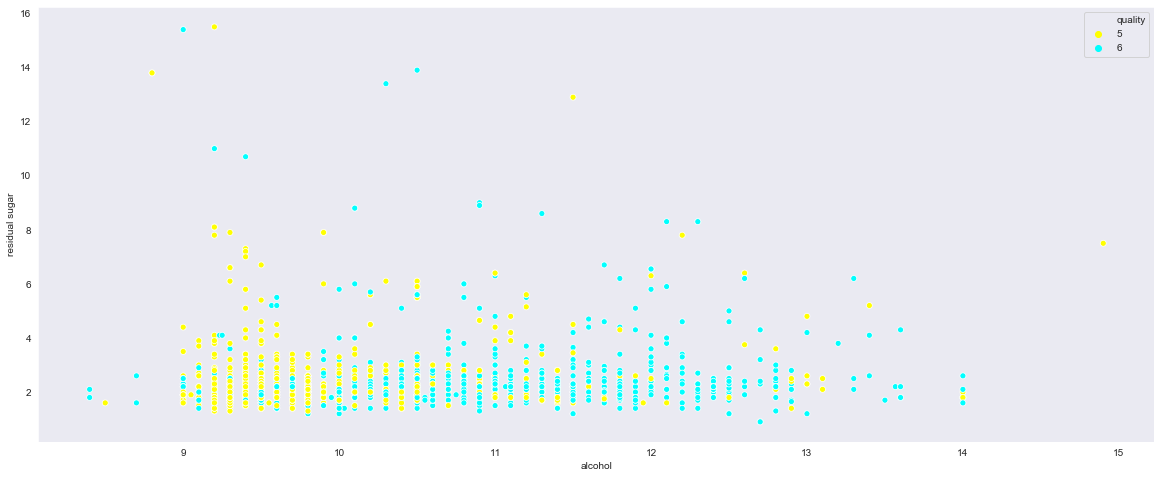

In [130]:
for i in ['volatile acidity','citric acid','residual sugar']:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine,y = i, x='alcohol',hue ='quality',palette=["yellow","cyan"])
    plt.show()

### PLOT:2

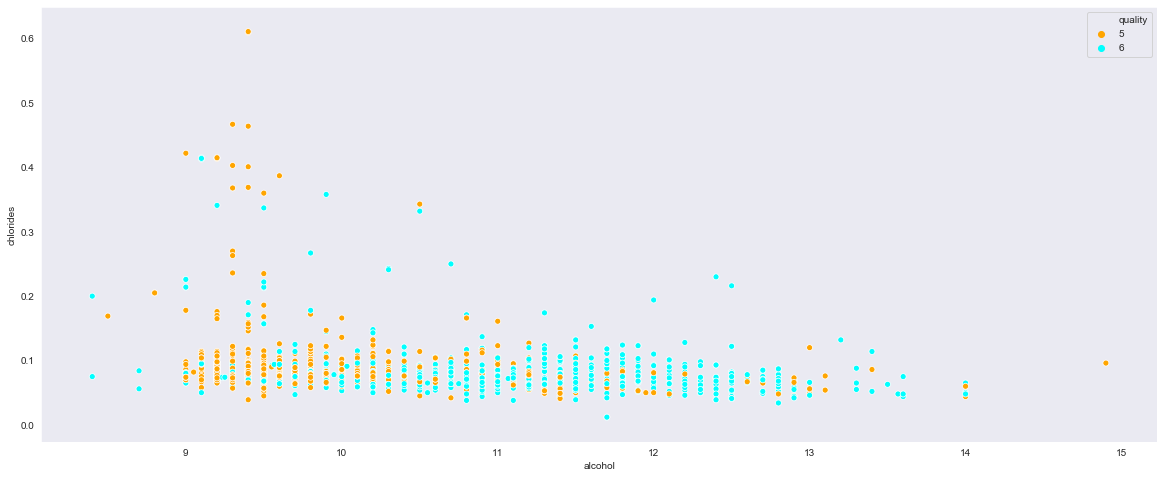

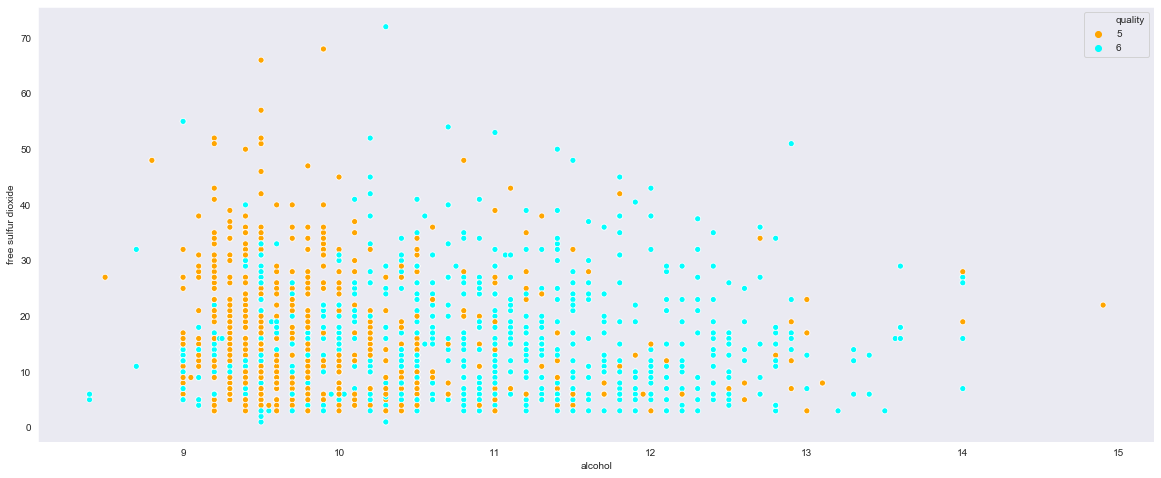

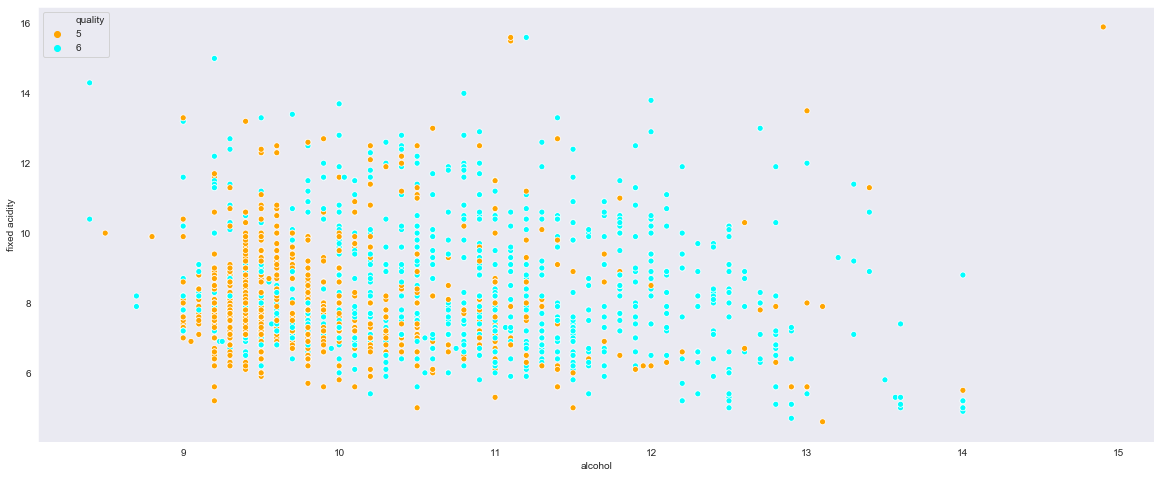

In [131]:
for i in ["chlorides","free sulfur dioxide","fixed acidity"]:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine,y = i, x='alcohol',hue ='quality',palette=["orange","cyan"])
    plt.show()

### PLOT:3

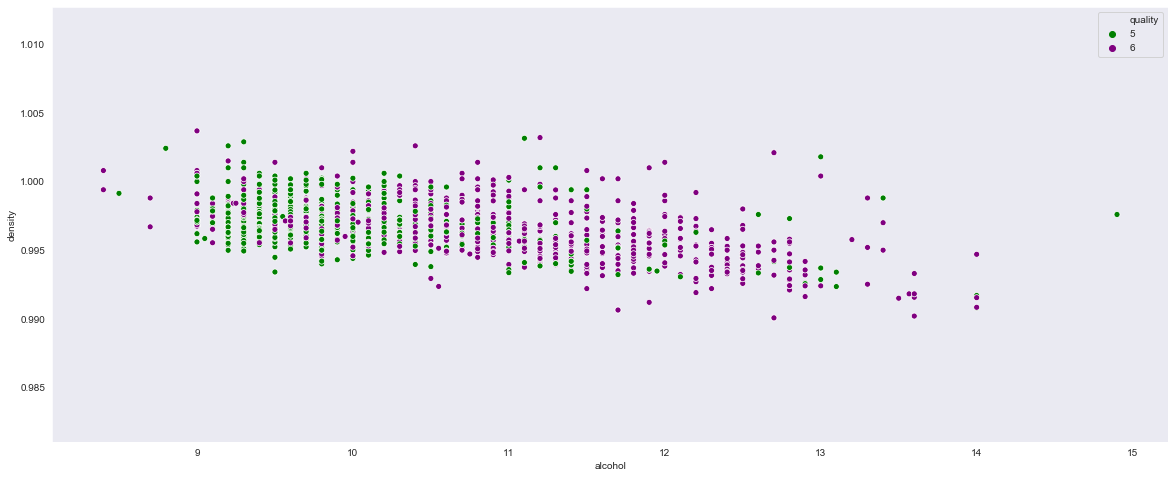

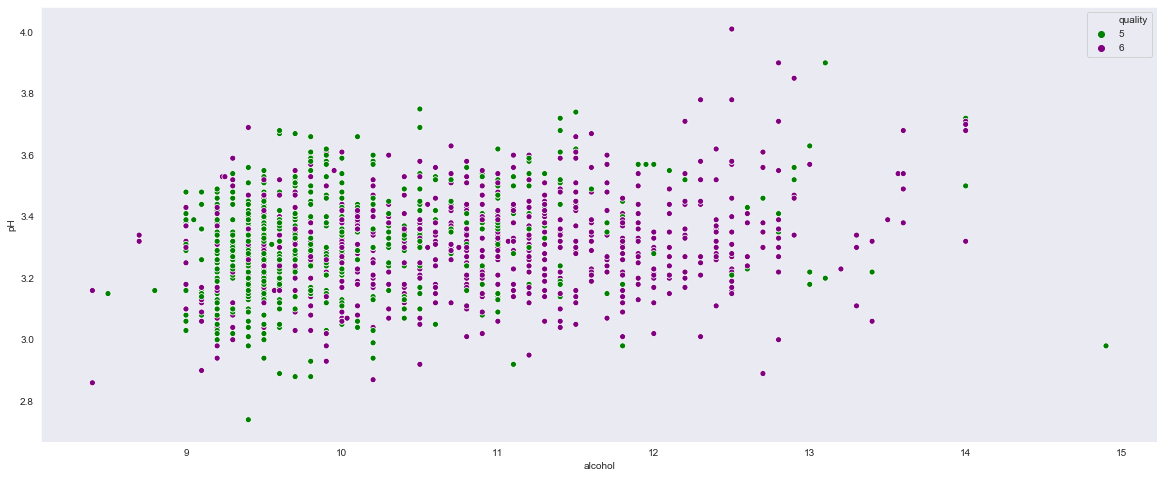

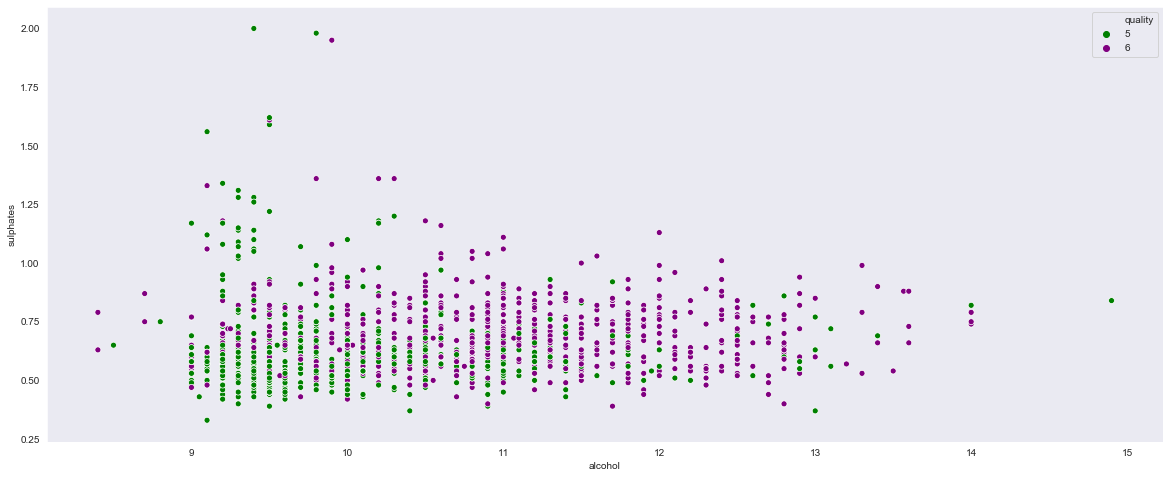

In [132]:
for i in ["density","pH","sulphates"]:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine,y = i, x='alcohol',hue ='quality',palette=["green","purple"])
    plt.show()


### Numerical Data Description

In [133]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Data Splitting

In [134]:
X = wine.drop(['quality'],axis=1)
Y = wine['quality'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit(X)
rescaledX_test = scaler.fit(X)

# <font color='crimson'>Decision Tree</font>

In [136]:
dt_model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)

In [137]:
X_pred_dt = dt_model.predict(X_train)
X_pred_dt

array(['6', '5', '5', ..., '5', '6', '6'], dtype=object)

In [138]:
print(classification_report(y_train,X_pred_dt))

              precision    recall  f1-score   support

           5       0.89      0.93      0.91       534
           6       0.93      0.89      0.91       585

    accuracy                           0.91      1119
   macro avg       0.91      0.91      0.91      1119
weighted avg       0.91      0.91      0.91      1119



In [139]:
y_pred_dt=dt_model.predict(X_test)
y_pred_dt

array(['5', '5', '6', '5', '6', '5', '5', '5', '5', '6', '6', '5', '6',
       '6', '6', '6', '6', '5', '6', '6', '6', '6', '5', '6', '6', '6',
       '6', '6', '5', '5', '5', '6', '6', '5', '5', '5', '6', '6', '5',
       '6', '5', '5', '6', '5', '6', '6', '6', '5', '5', '5', '5', '5',
       '6', '6', '5', '5', '6', '5', '5', '5', '5', '6', '6', '5', '6',
       '5', '6', '6', '6', '6', '6', '5', '6', '5', '6', '5', '5', '5',
       '5', '6', '5', '6', '5', '6', '5', '6', '5', '6', '6', '5', '6',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '5', '6', '6',
       '6', '6', '6', '5', '6', '5', '5', '5', '6', '5', '5', '5', '5',
       '5', '5', '6', '6', '5', '6', '6', '5', '5', '6', '5', '5', '5',
       '6', '5', '5', '6', '5', '5', '5', '5', '5', '6', '6', '5', '6',
       '6', '6', '5', '6', '6', '5', '5', '6', '6', '5', '5', '6', '5',
       '6', '6', '5', '6', '6', '6', '6', '5', '6', '6', '6', '5', '5',
       '5', '5', '5', '6', '5', '6', '6', '6', '5', '6', '5', '5

In [140]:
y_test

array(['6', '5', '6', '5', '6', '5', '5', '5', '5', '6', '6', '6', '5',
       '5', '6', '6', '5', '6', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '6', '5', '6', '5', '5', '6', '5', '6', '5', '6', '5', '5',
       '6', '5', '5', '6', '5', '5', '6', '6', '6', '5', '6', '5', '5',
       '5', '6', '6', '6', '6', '5', '5', '5', '5', '6', '5', '6', '6',
       '5', '6', '5', '6', '5', '6', '5', '6', '6', '6', '5', '5', '5',
       '6', '6', '5', '6', '5', '6', '6', '6', '5', '6', '6', '5', '6',
       '6', '5', '5', '5', '6', '5', '6', '5', '6', '5', '5', '5', '6',
       '6', '6', '6', '5', '6', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '5', '5',
       '6', '5', '5', '5', '6', '5', '5', '5', '5', '6', '6', '6', '5',
       '5', '5', '5', '6', '6', '6', '5', '6', '6', '6', '5', '6', '5',
       '5', '6', '6', '6', '6', '5', '6', '5', '5', '5', '6', '6', '5',
       '5', '6', '5', '6', '6', '6', '6', '6', '5', '5', '6', '5

In [141]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[147,  71],
       [ 88, 174]], dtype=int64)

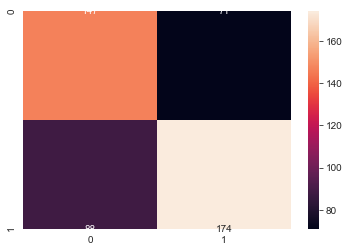

In [142]:
sns.heatmap(cm_dt,annot=True,fmt='d')

In [143]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           5       0.63      0.67      0.65       218
           6       0.71      0.66      0.69       262

    accuracy                           0.67       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.67      0.67      0.67       480



In [144]:
print("Trainig accuracy",dt_model.score(X_train,y_train))  
print()
print("Testing accuracy",dt_model.score(X_test, y_test))
print()

Trainig accuracy 0.9088471849865952

Testing accuracy 0.66875



# <font color='crimson'>Random Forest</font>

In [172]:
rf_model = RandomForestClassifier(criterion='entropy',random_state=42,max_depth=7,max_features=None,
                                  min_samples_leaf=4,min_samples_split=6,
                                  n_estimators=1000,oob_score=True,class_weight='balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=None, min_samples_leaf=4,
                       min_samples_split=6, n_estimators=1000, oob_score=True,
                       random_state=42)

In [173]:
X_pred_rf = rf_model.predict(X_train)
X_pred_rf

array(['6', '6', '5', ..., '5', '6', '6'], dtype=object)

In [174]:
print(classification_report(y_train,X_pred_rf))

              precision    recall  f1-score   support

           5       0.85      0.89      0.87       534
           6       0.90      0.85      0.87       585

    accuracy                           0.87      1119
   macro avg       0.87      0.87      0.87      1119
weighted avg       0.87      0.87      0.87      1119



In [175]:
y_pred_rf=rf_model.predict(X_test)
y_pred_rf

array(['5', '5', '5', '5', '6', '5', '5', '5', '6', '6', '6', '5', '6',
       '5', '5', '6', '5', '6', '6', '5', '5', '5', '6', '6', '5', '6',
       '6', '5', '5', '6', '5', '5', '6', '5', '5', '5', '6', '6', '5',
       '6', '5', '5', '6', '5', '6', '6', '6', '6', '5', '6', '5', '5',
       '6', '6', '5', '5', '6', '6', '5', '5', '6', '6', '5', '5', '6',
       '5', '6', '5', '6', '5', '6', '5', '6', '6', '6', '5', '6', '5',
       '6', '6', '5', '6', '5', '5', '6', '6', '5', '6', '6', '5', '6',
       '6', '5', '5', '5', '5', '5', '6', '5', '5', '5', '5', '6', '6',
       '6', '6', '6', '5', '6', '5', '6', '5', '6', '5', '5', '6', '6',
       '5', '5', '6', '6', '5', '6', '5', '6', '5', '6', '5', '5', '6',
       '6', '5', '5', '6', '6', '5', '5', '5', '5', '6', '6', '6', '6',
       '5', '6', '5', '6', '6', '6', '5', '6', '6', '5', '5', '6', '6',
       '5', '6', '5', '6', '6', '6', '6', '5', '5', '6', '5', '5', '5',
       '5', '5', '5', '6', '5', '6', '6', '6', '5', '5', '5', '5

In [176]:
y_test

array(['6', '5', '6', '5', '6', '5', '5', '5', '5', '6', '6', '6', '5',
       '5', '6', '6', '5', '6', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '6', '5', '6', '5', '5', '6', '5', '6', '5', '6', '5', '5',
       '6', '5', '5', '6', '5', '5', '6', '6', '6', '5', '6', '5', '5',
       '5', '6', '6', '6', '6', '5', '5', '5', '5', '6', '5', '6', '6',
       '5', '6', '5', '6', '5', '6', '5', '6', '6', '6', '5', '5', '5',
       '6', '6', '5', '6', '5', '6', '6', '6', '5', '6', '6', '5', '6',
       '6', '5', '5', '5', '6', '5', '6', '5', '6', '5', '5', '5', '6',
       '6', '6', '6', '5', '6', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '5', '5',
       '6', '5', '5', '5', '6', '5', '5', '5', '5', '6', '6', '6', '5',
       '5', '5', '5', '6', '6', '6', '5', '6', '6', '6', '5', '6', '5',
       '5', '6', '6', '6', '6', '5', '6', '5', '5', '5', '6', '6', '5',
       '5', '6', '5', '6', '6', '6', '6', '6', '5', '5', '6', '5

In [177]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[168,  50],
       [ 70, 192]], dtype=int64)

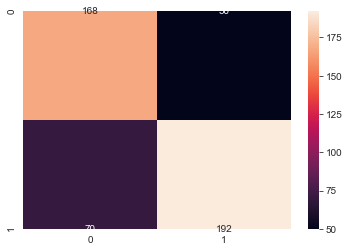

In [178]:
sns.heatmap(cm_rf,annot=True,fmt='d')

In [179]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           5       0.71      0.77      0.74       218
           6       0.79      0.73      0.76       262

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [180]:
print("Trainig accuracy",rf_model.score(X_train,y_train))  
print()
print("Testing accuracy",rf_model.score(X_test, y_test))
print()

Trainig accuracy 0.871313672922252

Testing accuracy 0.75



# <font color='crimson'>KNN</font>

In [154]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [155]:
X_pred_knn=knn.predict(X_train)
X_pred_knn

array(['6', '5', '5', ..., '5', '6', '6'], dtype=object)

In [156]:
print(classification_report(y_train,X_pred_knn))

              precision    recall  f1-score   support

           5       0.70      0.72      0.71       534
           6       0.74      0.72      0.73       585

    accuracy                           0.72      1119
   macro avg       0.72      0.72      0.72      1119
weighted avg       0.72      0.72      0.72      1119



In [157]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array(['5', '5', '6', '5', '6', '5', '5', '5', '5', '5', '6', '5', '6',
       '6', '6', '6', '5', '5', '6', '6', '6', '5', '6', '6', '6', '6',
       '5', '5', '5', '6', '5', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '6', '5', '6', '5', '6', '5', '6', '6', '5', '6', '5', '5',
       '5', '5', '5', '5', '6', '6', '6', '6', '5', '5', '6', '5', '6',
       '6', '6', '5', '6', '6', '5', '5', '6', '6', '6', '5', '5', '5',
       '5', '5', '5', '5', '6', '5', '6', '5', '6', '6', '6', '5', '5',
       '5', '6', '6', '5', '5', '5', '6', '5', '6', '5', '5', '5', '6',
       '6', '6', '6', '5', '5', '5', '6', '5', '6', '5', '6', '5', '6',
       '6', '5', '6', '5', '5', '6', '5', '5', '6', '6', '6', '5', '6',
       '6', '5', '5', '6', '6', '5', '6', '5', '5', '6', '6', '6', '6',
       '6', '6', '5', '6', '6', '6', '5', '5', '6', '5', '5', '6', '6',
       '5', '6', '6', '6', '6', '5', '5', '5', '6', '6', '5', '5', '5',
       '5', '5', '5', '6', '6', '5', '5', '5', '5', '5', '6', '5

In [158]:
y_test

array(['6', '5', '6', '5', '6', '5', '5', '5', '5', '6', '6', '6', '5',
       '5', '6', '6', '5', '6', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '6', '5', '6', '5', '5', '6', '5', '6', '5', '6', '5', '5',
       '6', '5', '5', '6', '5', '5', '6', '6', '6', '5', '6', '5', '5',
       '5', '6', '6', '6', '6', '5', '5', '5', '5', '6', '5', '6', '6',
       '5', '6', '5', '6', '5', '6', '5', '6', '6', '6', '5', '5', '5',
       '6', '6', '5', '6', '5', '6', '6', '6', '5', '6', '6', '5', '6',
       '6', '5', '5', '5', '6', '5', '6', '5', '6', '5', '5', '5', '6',
       '6', '6', '6', '5', '6', '5', '5', '5', '6', '5', '6', '6', '6',
       '6', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '5', '5',
       '6', '5', '5', '5', '6', '5', '5', '5', '5', '6', '6', '6', '5',
       '5', '5', '5', '6', '6', '6', '5', '6', '6', '6', '5', '6', '5',
       '5', '6', '6', '6', '6', '5', '6', '5', '5', '5', '6', '6', '5',
       '5', '6', '5', '6', '6', '6', '6', '6', '5', '5', '6', '5

In [159]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[130,  88],
       [ 93, 169]], dtype=int64)

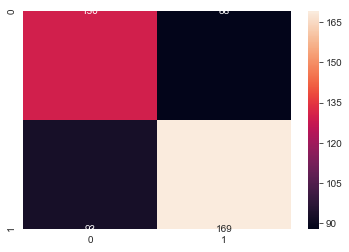

In [160]:
sns.heatmap(cm_knn,annot=True,fmt='d')

In [161]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           5       0.58      0.60      0.59       218
           6       0.66      0.65      0.65       262

    accuracy                           0.62       480
   macro avg       0.62      0.62      0.62       480
weighted avg       0.62      0.62      0.62       480



In [162]:
print("Trainig accuracy",knn.score(X_train,y_train))  
print()
print("Testing accuracy",knn.score(X_test, y_test))
print()

Trainig accuracy 0.7202859696157283

Testing accuracy 0.6229166666666667

